## This a Machine Learning Model that predicts the toss winner and match winner for the IPL 2025 Matches.



#### Importing the libraries.
Import all required ML libraries, preprocessing tools, metrics, and visualization packages.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

#### Loadind the datasets.
matches.csv: Match-level data

deliveries.csv: Ball-by-ball data

In [2]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

#### Cleaning the data sets.
Ensures consistent and clean data for training.
Handles missing/null values.
Standardizes team names.
Fixes overs from 0–19 → 1–20.

In [38]:
matches['player_of_match'].fillna('Unknown', inplace=True)
matches['city'].fillna('Unknown', inplace=True)
matches['winner'].fillna('No Result', inplace=True)
matches['result_margin'].fillna(0, inplace=True)
matches['target_runs'].fillna(0, inplace=True)
matches['target_overs'].fillna(0, inplace=True)
matches.loc[matches['venue'] == 'Sharjah Cricket Stadium', 'city'] = 'Sharjah'
matches.loc[matches['venue'] == 'Dubai International Cricket Stadium', 'city'] = 'Dubai'

team_fixes = {
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Kings XI Punjab':'Punjab Kings',
    
}
deliveries['batting_team'] = deliveries['batting_team'].replace(team_fixes)
deliveries['bowling_team'] = deliveries['bowling_team'].replace(team_fixes)
deliveries['over'] = deliveries['over'] + 1

C:\Users\Sai\AppData\Local\Temp\ipykernel_80160\4044611842.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['player_of_match'].fillna('Unknown', inplace=True)
C:\Users\Sai\AppData\Local\Temp\ipykernel_80160\4044611842.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

#### Data Encoding.
Converts strings (team/venue/decision) into machine-readable numeric values

In [28]:
team_encoder = LabelEncoder()
venue_encoder = LabelEncoder()
decision_encoder = LabelEncoder()

team_encoder.fit(pd.concat([matches['team1'], matches['team2'], matches['toss_winner'], matches['winner']]))
venue_encoder.fit(matches['venue'])
decision_encoder.fit(matches['toss_decision'])

LabelEncoder()

#### Toss MOdel Training

In [29]:
toss_data = matches[['team1', 'team2', 'venue', 'toss_winner']].dropna()
toss_data['team1'] = team_encoder.transform(toss_data['team1'])
toss_data['team2'] = team_encoder.transform(toss_data['team2'])
toss_data['venue'] = venue_encoder.transform(toss_data['venue'])
toss_data['toss_winner'] = team_encoder.transform(toss_data['toss_winner'])

X_toss = toss_data[['team1', 'team2', 'venue']]
y_toss = toss_data['toss_winner']
X_train_toss, X_test_toss, y_train_toss, y_test_toss = train_test_split(X_toss, y_toss, test_size=0.2, random_state=42)

#### Toss Model Comaprisons.

In [30]:
toss_models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVC": SVC()
}

toss_results = []
print("🔍 Toss Model Comparison:\n")
for name, model in toss_models.items():
    model.fit(X_train_toss, y_train_toss)
    y_pred = model.predict(X_test_toss)
    acc = accuracy_score(y_test_toss, y_pred)
    toss_results.append((name, model, acc))
    print(f"{name} Accuracy: {acc:.4f}")

🔍 Toss Model Comparison:

Random Forest Accuracy: 0.4521


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.2283
KNN Accuracy: 0.3699
Decision Tree Accuracy: 0.4475
Gradient Boosting Accuracy: 0.5114
SVC Accuracy: 0.3470


#### Choosing Best Toss Model.

In [31]:
best_toss_model = max(toss_results, key=lambda x: x[2])
toss_model = best_toss_model[1]
print(f"\n Best Toss Model: {best_toss_model[0]} with Accuracy: {best_toss_model[2]:.4f}")



 Best Toss Model: Gradient Boosting with Accuracy: 0.5114


#### MAtch Model Training.

In [32]:
match_data = matches[['team1', 'team2', 'venue', 'toss_winner', 'toss_decision', 'winner']].dropna()
match_data['team1'] = team_encoder.transform(match_data['team1'])
match_data['team2'] = team_encoder.transform(match_data['team2'])
match_data['venue'] = venue_encoder.transform(match_data['venue'])
match_data['toss_winner'] = team_encoder.transform(match_data['toss_winner'])
match_data['toss_decision'] = decision_encoder.transform(match_data['toss_decision'])
match_data['winner'] = team_encoder.transform(match_data['winner'])

X_match = match_data[['team1', 'team2', 'venue', 'toss_winner', 'toss_decision']]
y_match = match_data['winner']
X_train_match, X_test_match, y_train_match, y_test_match = train_test_split(X_match, y_match, test_size=0.2, random_state=42)


#### MAtch Model Comparison.

In [33]:
match_models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVC": SVC()
}

match_results = []
print("\n🔍 Match Model Comparison:\n")
for name, model in match_models.items():
    model.fit(X_train_match, y_train_match)
    y_pred = model.predict(X_test_match)
    acc = accuracy_score(y_test_match, y_pred)
    match_results.append((name, model, acc))
    print(f"{name} Accuracy: {acc:.4f}")


🔍 Match Model Comparison:

Random Forest Accuracy: 0.4247


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.1918
KNN Accuracy: 0.3470
Decision Tree Accuracy: 0.3927
Gradient Boosting Accuracy: 0.4475
SVC Accuracy: 0.3242


#### Choosing Best Match Model.

In [34]:
best_match_model = max(match_results, key=lambda x: x[2])
match_model = best_match_model[1]
print(f"\n🏆 Best Match Model: {best_match_model[0]} with Accuracy: {best_match_model[2]:.4f}")


🏆 Best Match Model: Gradient Boosting with Accuracy: 0.4475


#### Prediction Function.

In [61]:
def predict_winner(team1, team2,venue):
    if team1 not in team_encoder.classes_ or team2 not in team_encoder.classes_:
        raise ValueError(f"Unknown team: {team1} or {team2}")
    if venue not in venue_encoder.classes_:
        print(f"⚠️ Warning: Venue '{venue}' not in training data. Using fallback 'Wankhede Stadium'.")
        venue = 'Wankhede Stadium'
    t1 = team_encoder.transform([team1])[0]
    t2 = team_encoder.transform([team2])[0]
    v = venue_encoder.transform([venue])[0]
    d = decision_encoder.transform(['field'])[0]
    toss_encoded = toss_model.predict([[t1, t2, v]])[0]
    toss_winner = team_encoder.inverse_transform([toss_encoded])[0]
    winner_encoded = match_model.predict([[t1, t2, v, toss_encoded, d]])[0]
    match_winner = team_encoder.inverse_transform([winner_encoded])[0]
    return toss_winner, match_winner

## Visualizations

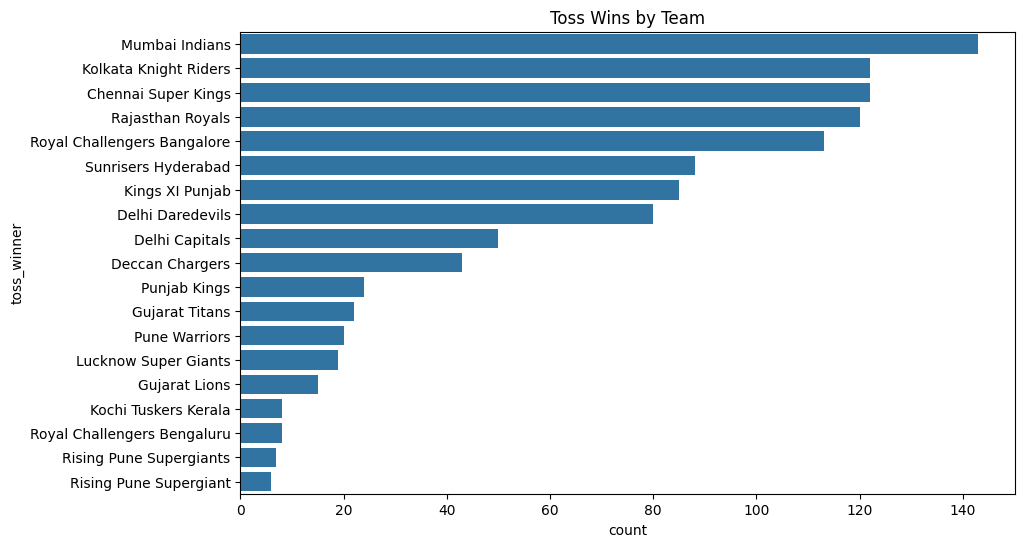

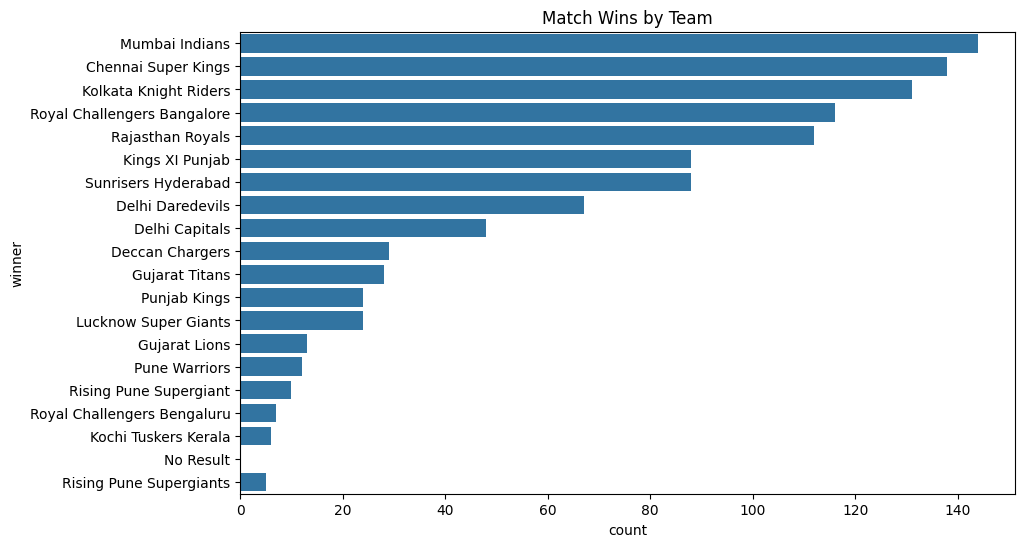

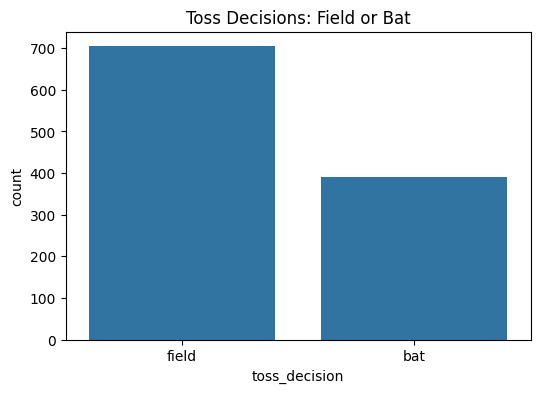

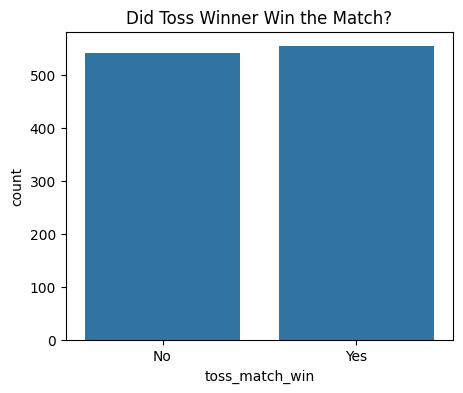

In [68]:
plt.figure(figsize=(10,6))
sns.countplot(y='toss_winner', data=matches, order=matches['toss_winner'].value_counts().index)
plt.title("Toss Wins by Team")
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(y='winner', data=matches[matches['winner'] != 'No Result'], order=matches['winner'].value_counts().index)
plt.title("Match Wins by Team")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='toss_decision', data=matches)
plt.title("Toss Decisions: Field or Bat")
plt.show()

matches['toss_match_win'] = matches['toss_winner'] == matches['winner']
plt.figure(figsize=(5,4))
sns.countplot(x=matches['toss_match_win'])
plt.xticks([0,1], ['No', 'Yes'])
plt.title("Did Toss Winner Win the Match?")
plt.show()

In [40]:
# See all team names used during model training
print(sorted(team_encoder.classes_))


['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals', 'Delhi Daredevils', 'Gujarat Lions', 'Gujarat Titans', 'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians', 'No Result', 'Pune Warriors', 'Punjab Kings', 'Rajasthan Royals', 'Rising Pune Supergiant', 'Rising Pune Supergiants', 'Royal Challengers Bangalore', 'Royal Challengers Bengaluru', 'Sunrisers Hyderabad']


#### 2025 IPL Prediction.

## Match 1 : 22/03/2025
#### Kolkata Knight Riders VS Royal Challengers Banglore.
#### Venue: Eden Gardens,Kolkata.

c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(



 Kolkata Knight Riders vs Royal Challengers Bangalore at Eden Gardens
 Predicted Toss Winner: Royal Challengers Bangalore
 Predicted Match Winner: Kolkata Knight Riders


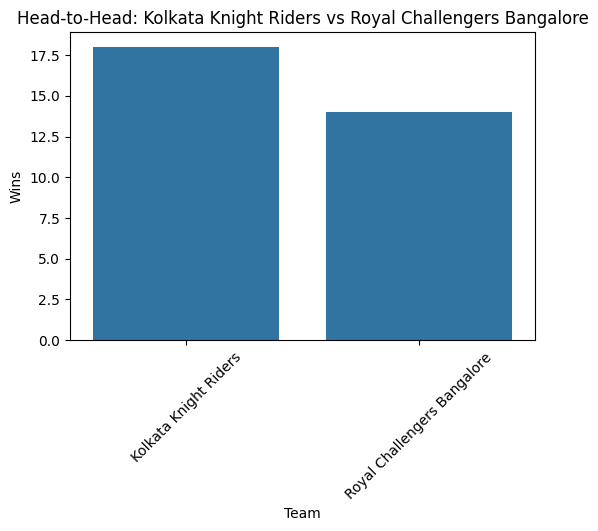

In [62]:

team1 = 'Kolkata Knight Riders'
team2 = 'Royal Challengers Bangalore'
venue = 'Eden Gardens'


toss, winner = predict_winner(team1, team2,venue)

print(f"\n {team1} vs {team2} at {venue}" )
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()


## Match 2 : 23/03/2025
#### Sunrisers Hyderabad vs Rajasthan Royals.
#### Venue: Rajiv Gandhi International Stadium,Hyderabad.

c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(



 Sunrisers Hyderabad vs Rajasthan Royals at Rajiv Gandhi International Stadium
 Predicted Toss Winner: Sunrisers Hyderabad
 Predicted Match Winner: Sunrisers Hyderabad


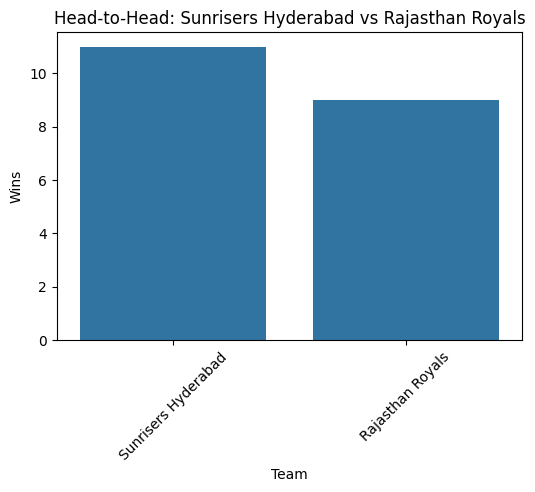

In [24]:

team1 = 'Sunrisers Hyderabad'
team2 = 'Rajasthan Royals'
venue = 'Rajiv Gandhi International Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()


## Match 3 : 23/03/2025
#### Chennai Super Kings VS Mumbai Indians.
#### Venue:MA Chidambaram Stadium,Chennai .


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(



 Chennai Super Kings vs Mumbai Indians at MA Chidambaram Stadium
 Predicted Toss Winner: Chennai Super Kings
 Predicted Match Winner: Mumbai Indians


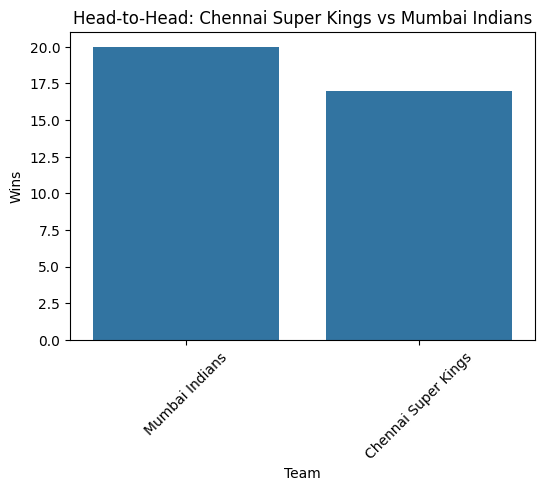

In [25]:
team1 = 'Chennai Super Kings'
team2 = 'Mumbai Indians'
venue = 'MA Chidambaram Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()


## Match 4 : 24/03/2025
#### Delhi Capitals VS Lucknow Super Giants.
#### Venue:ACA-VDCA Cricket Stadium, Vishakhapatnam .


⚠️ Warning: Venue 'ACA-VDCA Cricket Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Delhi Capitals vs Lucknow Super Giants at ACA-VDCA Cricket Stadium
 Predicted Toss Winner: Lucknow Super Giants
 Predicted Match Winner: Delhi Capitals


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


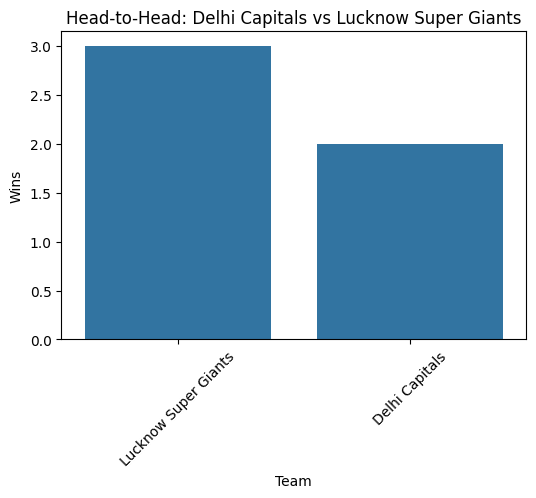

In [26]:
team1 = 'Delhi Capitals'
team2 = 'Lucknow Super Giants'
venue = 'ACA-VDCA Cricket Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 5 : 25/03/2025
#### Gujarat Titans VS Punjab Kings.
#### Venue:Narendra Modi Stadium,Ahemdabad .


⚠️ Warning: Venue 'Narendra Modi Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Gujarat Titans vs Punjab Kings at Narendra Modi Stadium
 Predicted Toss Winner: Gujarat Titans
 Predicted Match Winner: Punjab Kings


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


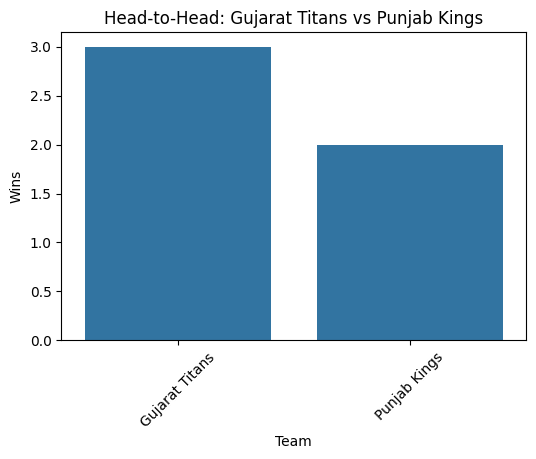

In [41]:
team1 = 'Gujarat Titans'
team2 = 'Punjab Kings'
venue = 'Narendra Modi Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 6 : 26/03/2025
#### Rajasthan Royals VS Kolkata Knight Riders.
#### Venue:Barsapara Stadium,Guwhati .

⚠️ Warning: Venue 'Barsapara Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Rajasthan Royals vs Kolkata Knight Riders at Barsapara Stadium
 Predicted Toss Winner: Kolkata Knight Riders
 Predicted Match Winner: Kolkata Knight Riders


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


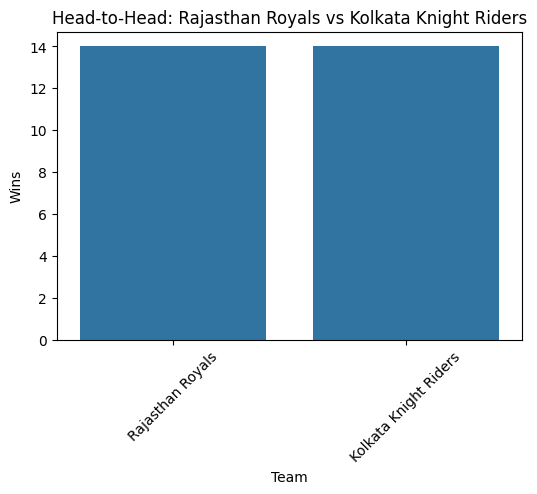

In [42]:
team1 = 'Rajasthan Royals'
team2 = 'Kolkata Knight Riders'
venue = 'Barsapara Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 7: 27/03/2025
#### Sunrisers Hyderabad VS Lucknow Super Giants.
#### Venue:Rajiv Gandhi International Stadium,Hyderabad .

c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(



 Sunrisers Hyderabad vs Lucknow Super Giants at Rajiv Gandhi International Stadium
 Predicted Toss Winner: Sunrisers Hyderabad
 Predicted Match Winner: Lucknow Super Giants


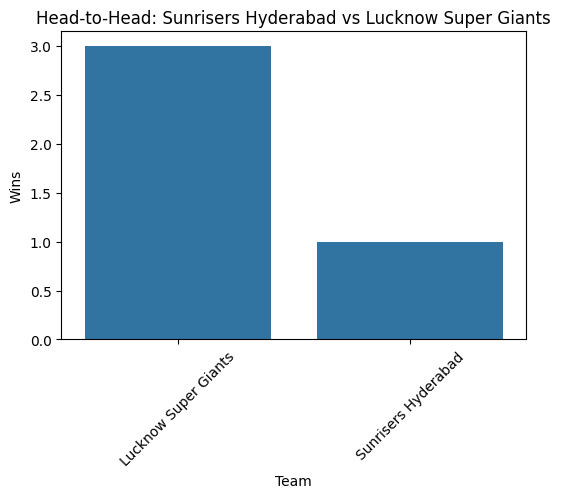

In [43]:
team1 = 'Sunrisers Hyderabad'
team2 = 'Lucknow Super Giants'
venue = 'Rajiv Gandhi International Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 8: 28/03/2025
#### Chennai Super Kings VS Royal Challengers Bangalore .
#### Venue:MA Chidambaram Stadium, Chennai .

c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(



 Chennai Super Kings vs Royal Challengers Bangalore at MA Chidambaram Stadium
 Predicted Toss Winner: Royal Challengers Bangalore
 Predicted Match Winner: Chennai Super Kings


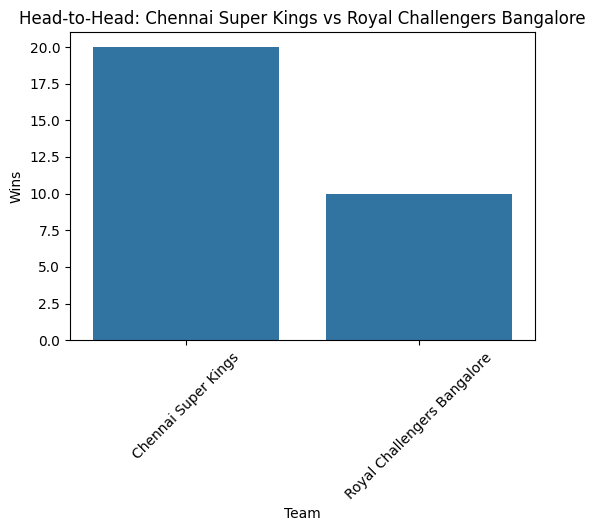

In [44]:
team1 = 'Chennai Super Kings'
team2 = 'Royal Challengers Bangalore'
venue = 'MA Chidambaram Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 9: 29/03/2025
#### Gujarat Titans VS Mumbai Indians .
#### Venue:Narendra Modi Stadium,Ahemdabad .

⚠️ Warning: Venue 'Narendra Modi Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Gujarat Titans vs Mumbai Indians at Narendra Modi Stadium
 Predicted Toss Winner: Mumbai Indians
 Predicted Match Winner: Gujarat Titans


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


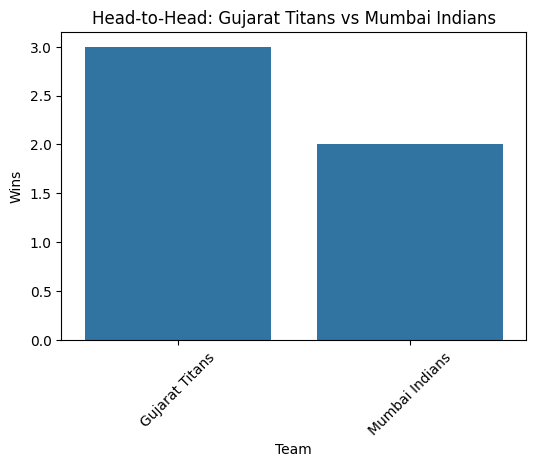

In [45]:
team1 = 'Gujarat Titans'
team2 = 'Mumbai Indians'
venue = 'Narendra Modi Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 10: 30/03/2025
#### Delhi Capitals VS Sunrisers Hyderabad .
#### Venue: ACA-VDCA Cricket Stadium.

⚠️ Warning: Venue 'ACA-VDCA Cricket Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Delhi Capitals vs Sunrisers Hyderabad at ACA-VDCA Cricket Stadium
 Predicted Toss Winner: Delhi Capitals
 Predicted Match Winner: Delhi Capitals


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


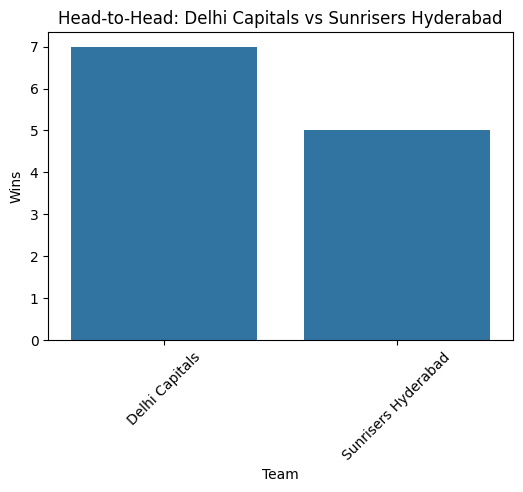

In [47]:
team1 = 'Delhi Capitals'
team2 = 'Sunrisers Hyderabad'
venue = 'ACA-VDCA Cricket Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 11: 30/03/2025
#### Rajasthan Royals VS Chennai Super Kings .
#### Venue:Barsapara Stadium.

⚠️ Warning: Venue 'Barsapara Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Rajasthan Royals vs Chennai Super Kings at Barsapara Stadium
 Predicted Toss Winner: Rajasthan Royals
 Predicted Match Winner: Chennai Super Kings


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


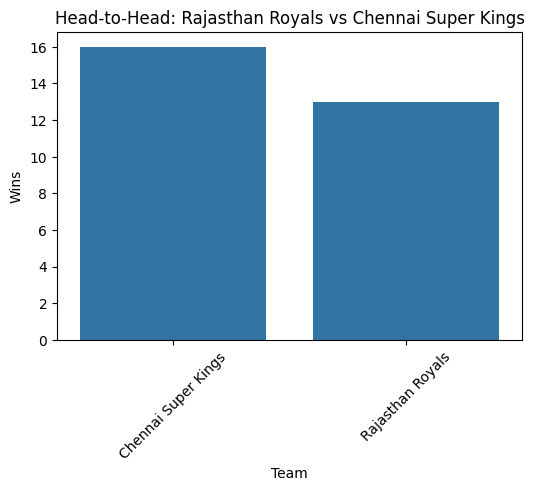

In [49]:
team1 = 'Rajasthan Royals'
team2 = 'Chennai Super Kings'
venue = 'Barsapara Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 12: 31/03/2025
#### Mumbai Indians VS Kolkata Knight Riders .
#### Venue:Wankhede Stadium.

c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(



 Mumbai Indians vs Kolkata Knight Riders at Wankhede Stadium
 Predicted Toss Winner: Mumbai Indians
 Predicted Match Winner: Mumbai Indians


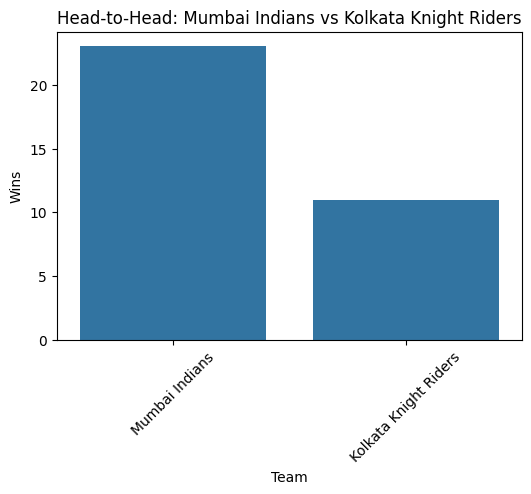

In [50]:
team1 = 'Mumbai Indians'
team2 = 'Kolkata Knight Riders'
venue = 'Wankhede Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 13: 1/04/2025
#### Lucknow Super Giants VS Punjab Kings .
#### Venue:Ekana Cricket Stadium .

⚠️ Warning: Venue 'Ekana Cricket Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Lucknow Super Giants vs Punjab Kings at Ekana Cricket Stadium
 Predicted Toss Winner: Mumbai Indians
 Predicted Match Winner: Lucknow Super Giants


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


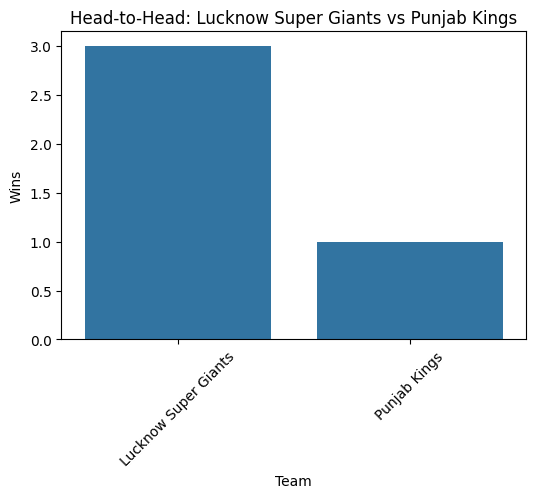

In [54]:
team1 = 'Lucknow Super Giants'
team2 = 'Punjab Kings'
venue = 'Ekana Cricket Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 14: 2/04/2025
#### Royal Challengers Bangalore  VS Gujarat Titans .
#### Venue:M. Chinnaswamy Stadium .

⚠️ Warning: Venue 'M. Chinnaswamy Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Royal Challengers Bangalore vs Gujarat Titans at M. Chinnaswamy Stadium
 Predicted Toss Winner: Royal Challengers Bangalore
 Predicted Match Winner: Gujarat Titans


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


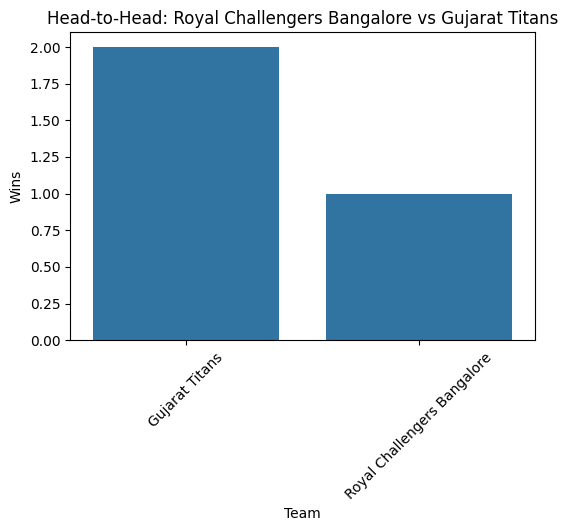

In [55]:
team1 = 'Royal Challengers Bangalore'
team2 = 'Gujarat Titans'
venue = 'M. Chinnaswamy Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 15: 3/04/2025
#### Kolkata Knight Riders  VS Sunrisers Hyderabad .
#### Venue:Eden Gardenns .

c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(



 Kolkata Knight Riders vs Sunrisers Hyderabad at Eden Gardens
 Predicted Toss Winner: Sunrisers Hyderabad
 Predicted Match Winner: Kolkata Knight Riders


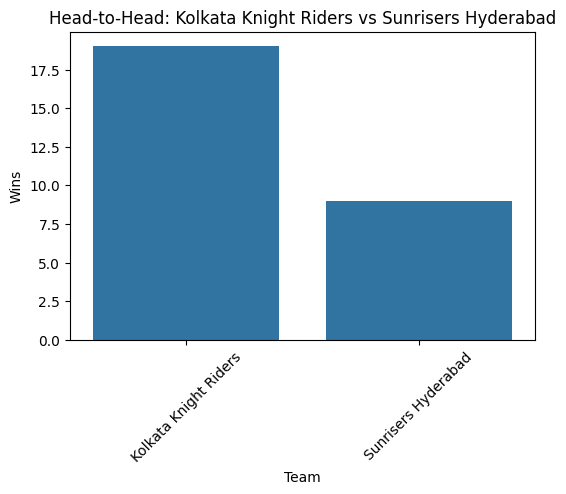

In [64]:
team1 = 'Kolkata Knight Riders'
team2 = 'Sunrisers Hyderabad'
venue = 'Eden Gardens'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 16: 4/04/2025
#### Lucknow Super Giants VS Mumbai Indians .
#### Venue:Ekana Cricket Stadium. 

⚠️ Warning: Venue 'Ekana Cricket Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Lucknow Super Giants vs Mumbai Indians at Ekana Cricket Stadium
 Predicted Toss Winner: Mumbai Indians
 Predicted Match Winner: Lucknow Super Giants


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


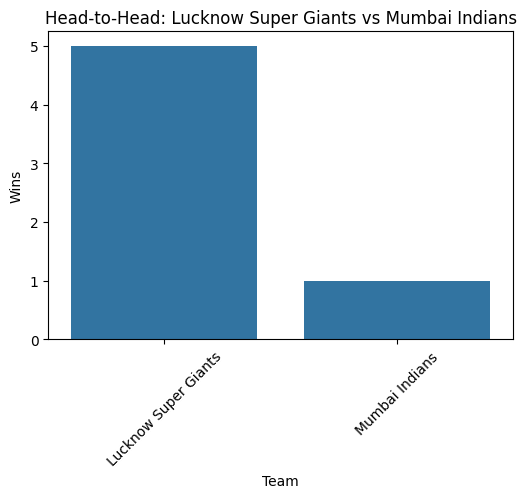

In [65]:
team1 = 'Lucknow Super Giants'
team2 = 'Mumbai Indians'
venue = 'Ekana Cricket Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 17: 5/04/2025
### Chennai Super Kings#   VS Delhi Capitals .
#### Venue:MA Chidambaram Stadium. 

c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(



 Chennai Super Kings vs Delhi Capitals at MA Chidambaram Stadium
 Predicted Toss Winner: Delhi Capitals
 Predicted Match Winner: Chennai Super Kings


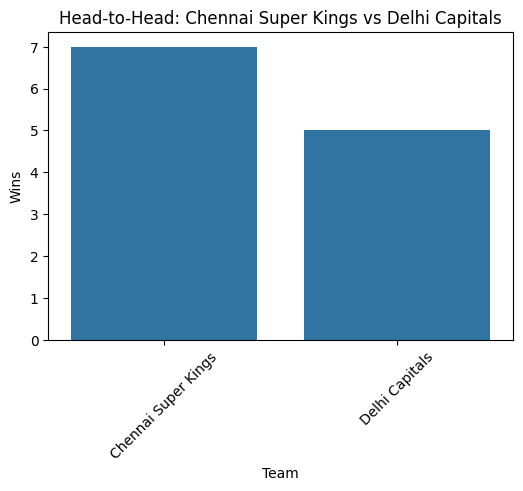

In [67]:

team1 = 'Chennai Super Kings'
team2 = 'Delhi Capitals'
venue = 'MA Chidambaram Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 18: 5/04/2025
### Punjab Kings   VS Rajasthan Royals .
#### Venue:Maharaja Yadavindra Singh International Cricket Stadium.

⚠️ Warning: Venue 'Maharaja Yadavindra Singh International Cricket Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Punjab Kings vs Rajasthan Royals at Maharaja Yadavindra Singh International Cricket Stadium
 Predicted Toss Winner: Rajasthan Royals
 Predicted Match Winner: Rajasthan Royals


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


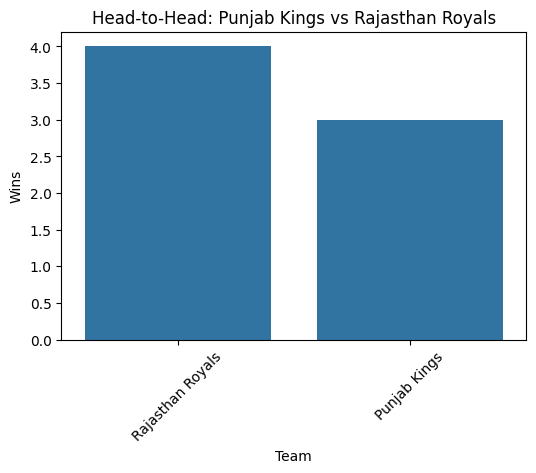

In [69]:

team1 = 'Punjab Kings'
team2 = 'Rajasthan Royals'
venue = 'Maharaja Yadavindra Singh International Cricket Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 19: 6/04/2025
#### Kolkata Knight Riders   VS Lucknow Super Giants .
#### Venue:Eden Gardens.

c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(



 Kolkata Knight Riders vs Lucknow Super Giants at Eden Gardens
 Predicted Toss Winner: Lucknow Super Giants
 Predicted Match Winner: Kolkata Knight Riders


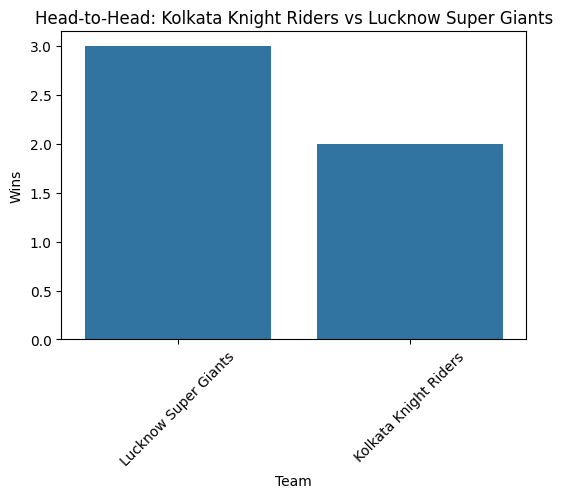

In [71]:

team1 = 'Kolkata Knight Riders'
team2 = 'Lucknow Super Giants'
venue = 'Eden Gardens'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 20: 6/04/2025
#### Sunrisers Hyderabad  VS Gujarat Titans .
#### Venue:Rajiv Gandhi International Stadium

c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(



 Sunrisers Hyderabad vs Gujarat Titans at Rajiv Gandhi International Stadium
 Predicted Toss Winner: Sunrisers Hyderabad
 Predicted Match Winner: Gujarat Titans


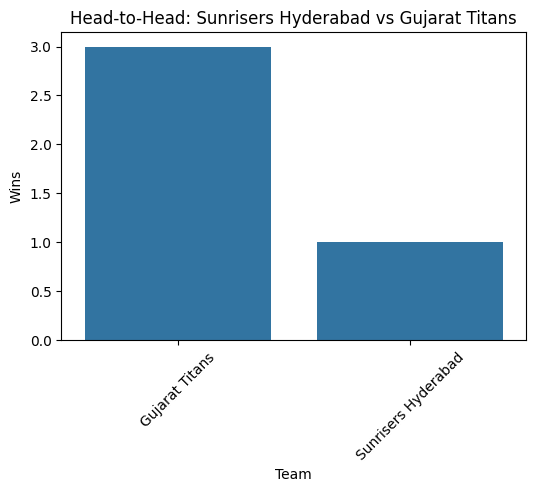

In [72]:
team1 = 'Sunrisers Hyderabad'
team2 = 'Gujarat Titans'
venue = 'Rajiv Gandhi International Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 21: 7/04/2025
#### Mumbai Indians  VS Royal Challengers Banglore .
#### Venue:Wankhede Stadium.

c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(



 Mumbai Indians vs Royal Challengers Bangalore at Wankhede Stadium
 Predicted Toss Winner: Royal Challengers Bangalore
 Predicted Match Winner: Mumbai Indians


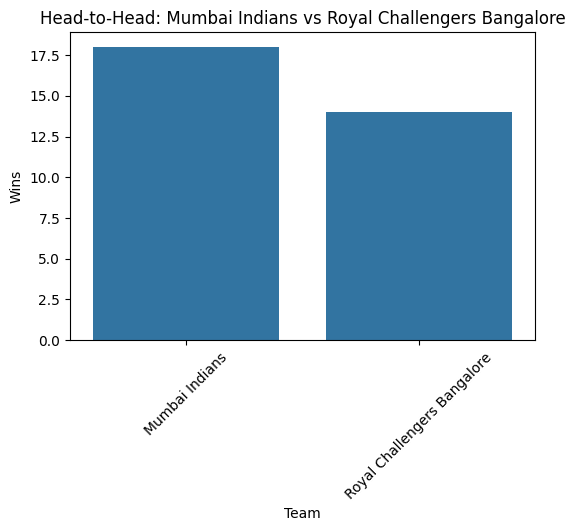

In [74]:
team1 = 'Mumbai Indians'
team2 = 'Royal Challengers Bangalore'
venue = 'Wankhede Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 22: 8/04/2025
#### Punjab Kings  VS Chennai Super Kings .
#### Venue:Maharaja Yadavindra Singh International Cricket Stadium

⚠️ Warning: Venue 'Maharaja Yadavindra Singh International Cricket Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Punjab Kings vs Chennai Super Kings at Maharaja Yadavindra Singh International Cricket Stadium
 Predicted Toss Winner: Chennai Super Kings
 Predicted Match Winner: Chennai Super Kings


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


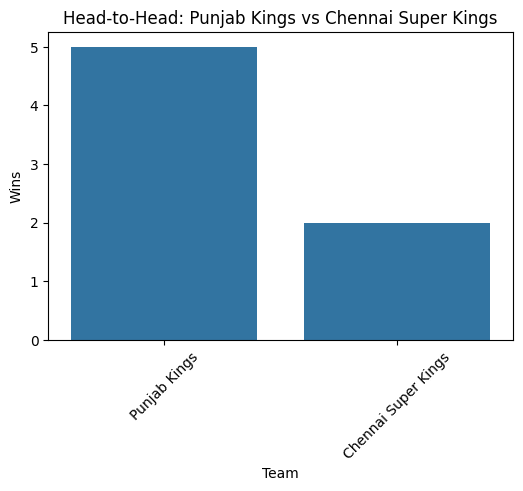

In [75]:
team1 = 'Punjab Kings'
team2 = 'Chennai Super Kings'
venue = 'Maharaja Yadavindra Singh International Cricket Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 23: 9/04/2025
#### Gujarat Titans  VS Rajasthan Royals .
#### Venue:Narendra Modi Stadium.

⚠️ Warning: Venue 'Narendra Modi Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Gujarat Titans vs Rajasthan Royals at Narendra Modi Stadium
 Predicted Toss Winner: Rajasthan Royals
 Predicted Match Winner: Rajasthan Royals


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


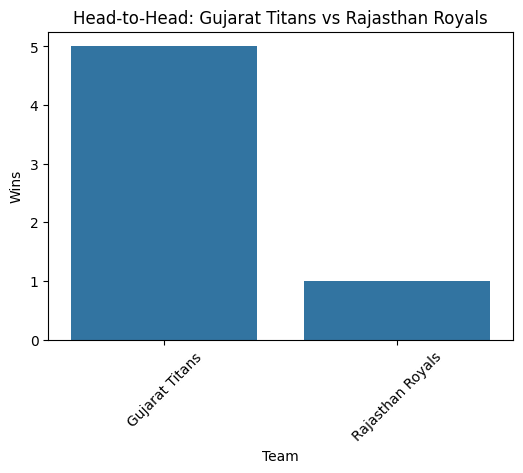

In [76]:
team1 = 'Gujarat Titans'
team2 = 'Rajasthan Royals'
venue = 'Narendra Modi Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 24: 10/04/2025
#### Royal Challengers Bangalore VS Delhi Capitals .
#### Venue:M. Chinnaswamy Stadium

c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(



 Royal Challengers Bangalore vs Delhi Capitals at M.Chinnaswamy Stadium
 Predicted Toss Winner: Delhi Capitals
 Predicted Match Winner: Royal Challengers Bangalore


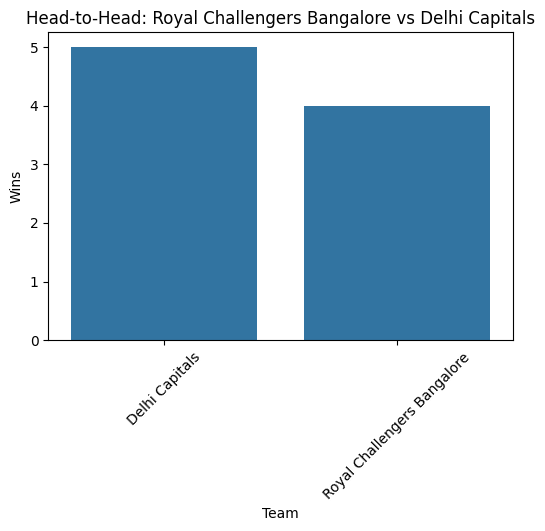

In [77]:
team1 = 'Royal Challengers Bangalore'
team2 = 'Delhi Capitals'
venue = 'M.Chinnaswamy Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 25: 11/04/2025
#### Chennai Super Kings VS Kolkata Knight Riders .
#### Venue:MA Chidambaram Stadium.


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(



 Chennai Super Kings vs Kolkata Knight Riders at MA Chidambaram Stadium
 Predicted Toss Winner: Kolkata Knight Riders
 Predicted Match Winner: Chennai Super Kings


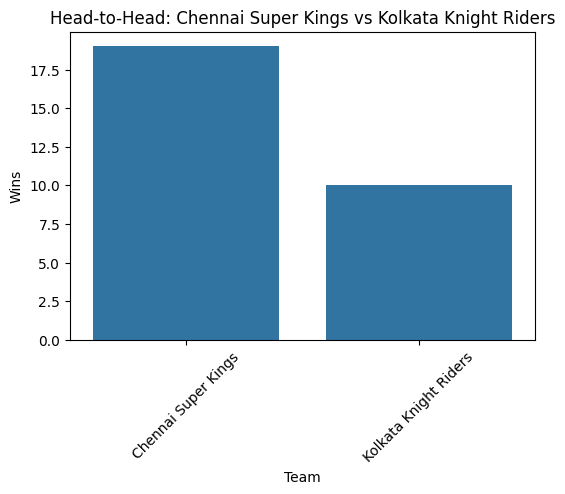

In [78]:
team1 = 'Chennai Super Kings'
team2 = 'Kolkata Knight Riders'
venue = 'MA Chidambaram Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 26: 12/04/2025
#### Lucknow Super Giants VS Gujarat Titans.
#### Venue:Ekana Cricket Stadium 

⚠️ Warning: Venue 'Ekana Cricket Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Lucknow Super Giants vs Gujarat Titans at Ekana Cricket Stadium
 Predicted Toss Winner: Gujarat Titans
 Predicted Match Winner: Gujarat Titans


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


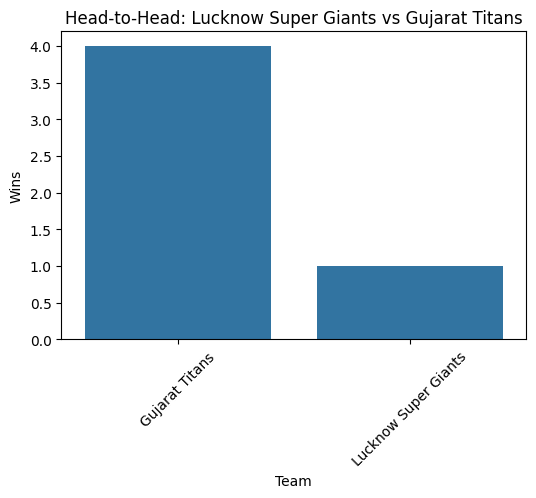

In [79]:
team1 = 'Lucknow Super Giants'
team2 = 'Gujarat Titans'
venue = 'Ekana Cricket Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 27: 12/04/2025
#### Sunrisers Hyderabad VS Punjab Kings
#### Venue:Rajiv Gandhi International Stadium

c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(



 Sunrisers Hyderabad vs Punjab Kings at Rajiv Gandhi International Stadium
 Predicted Toss Winner: Sunrisers Hyderabad
 Predicted Match Winner: Sunrisers Hyderabad


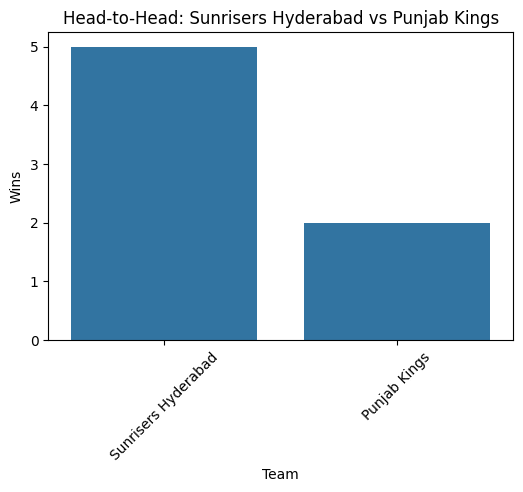

In [80]:
team1 = 'Sunrisers Hyderabad'
team2 = 'Punjab Kings'
venue = 'Rajiv Gandhi International Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 28: 13/04/2025
#### Rajasthan Royals VS Royal Challengers Bangalore
#### Venue:Sawai Mansingh Stadium

c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(



 Rajasthan Royals vs Royal Challengers Bangalore at Sawai Mansingh Stadium
 Predicted Toss Winner: Rajasthan Royals
 Predicted Match Winner: Royal Challengers Bangalore


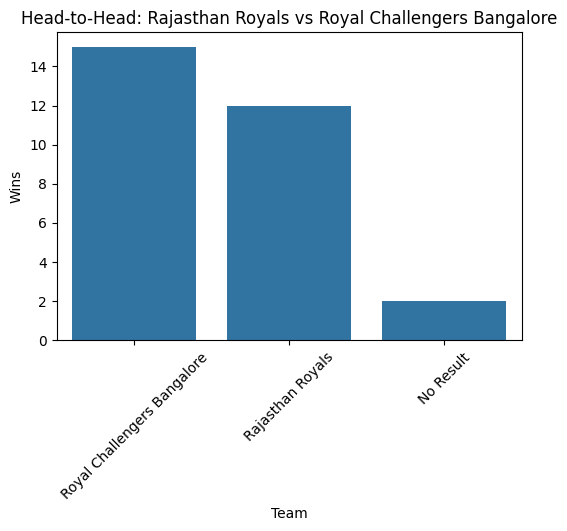

In [81]:
team1 = 'Rajasthan Royals'
team2 = 'Royal Challengers Bangalore'
venue = 'Sawai Mansingh Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 29: 14/04/2025
#### Delhi Capitals VS Mumbai Indians
#### Venue:Arun Jaitley Stadium

c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(



 Delhi Capitals vs Mumbai Indians at Arun Jaitley Stadium
 Predicted Toss Winner: Delhi Capitals
 Predicted Match Winner: Delhi Capitals


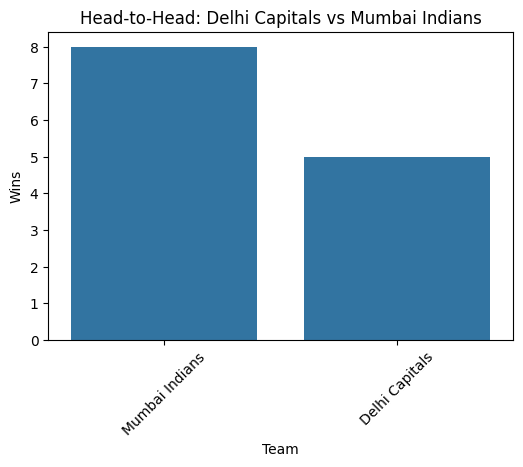

In [82]:
team1 = 'Delhi Capitals'
team2 = 'Mumbai Indians'
venue = 'Arun Jaitley Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 30: 15/04/2025
####  Lucknow Super Giants VS Chennai Super Kings
#### Venue:Ekana Cricket Stadium 

⚠️ Warning: Venue 'Ekana Cricket Stadium ' not in training data. Using fallback 'Wankhede Stadium'.

 Lucknow Super Giants vs Chennai Super Kings at Ekana Cricket Stadium 
 Predicted Toss Winner: Chennai Super Kings
 Predicted Match Winner: Chennai Super Kings


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


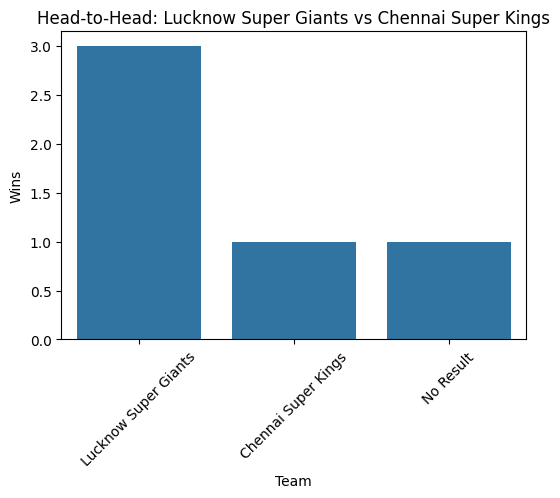

In [83]:
team1 = 'Lucknow Super Giants'
team2 = 'Chennai Super Kings'
venue = 'Ekana Cricket Stadium '


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 31:
####  Punjab Kings  VS Kolkata Knight Riders
#### Venue:Maharaja Yadavindra Singh International Cricket Stadium

⚠️ Warning: Venue 'Maharaja Yadavindra Singh International Cricket Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Punjab Kings vs Kolkata Knight Riders at Maharaja Yadavindra Singh International Cricket Stadium
 Predicted Toss Winner: Kolkata Knight Riders
 Predicted Match Winner: Kolkata Knight Riders


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


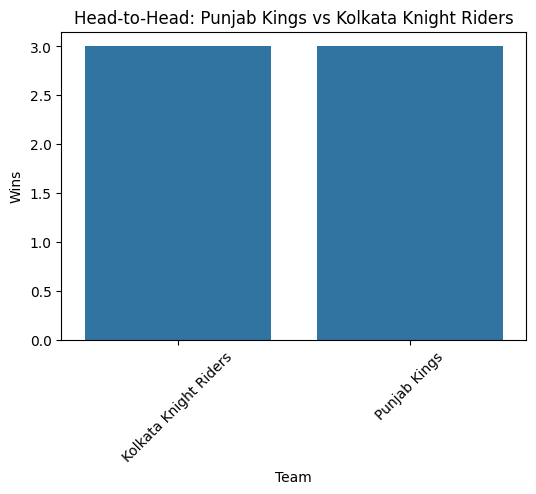

In [84]:
team1 = 'Punjab Kings'
team2 = 'Kolkata Knight Riders'
venue = 'Maharaja Yadavindra Singh International Cricket Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 32:
#### Delhi Capitals VS Rajasthan Royals
#### Venue:Arun Jaitley Stadium

c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(



 Delhi Capitals vs Rajasthan Royals at Arun Jaitley Stadium
 Predicted Toss Winner: Delhi Capitals
 Predicted Match Winner: Delhi Capitals


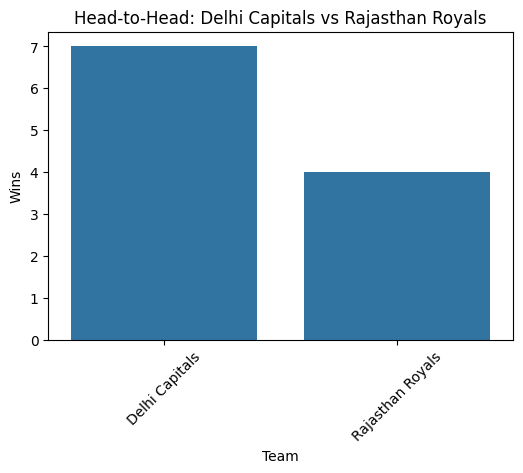

In [85]:
team1 = 'Delhi Capitals'
team2 = 'Rajasthan Royals'
venue = 'Arun Jaitley Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 33: 
#### Sunrisers Hyderabad VS Mumbai Indians.
#### Venue:Wankhede Stadium


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(



 Sunrisers Hyderabad vs Mumbai Indians at Wankhede Stadium
 Predicted Toss Winner: Mumbai Indians
 Predicted Match Winner: Sunrisers Hyderabad


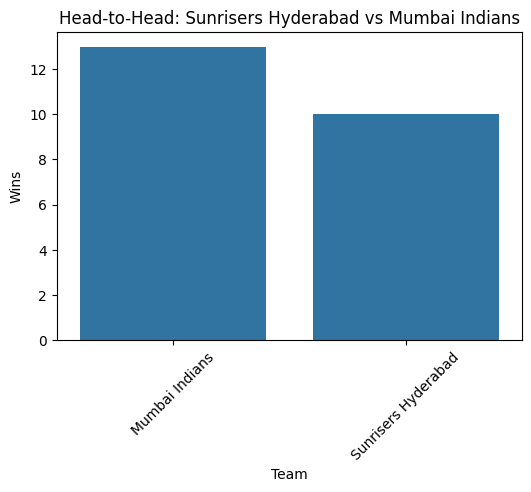

In [86]:
team1 = 'Sunrisers Hyderabad'
team2 = 'Mumbai Indians'
venue = 'Wankhede Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 34: 
#### Royal Challengers Bangalore VS Punjab Kings
#### Venue:M.Chinnaswamy Stadium

c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(



 Royal Challengers Bangalore vs Punjab Kings at M.Chinnaswamy Stadium
 Predicted Toss Winner: Punjab Kings
 Predicted Match Winner: Royal Challengers Bangalore


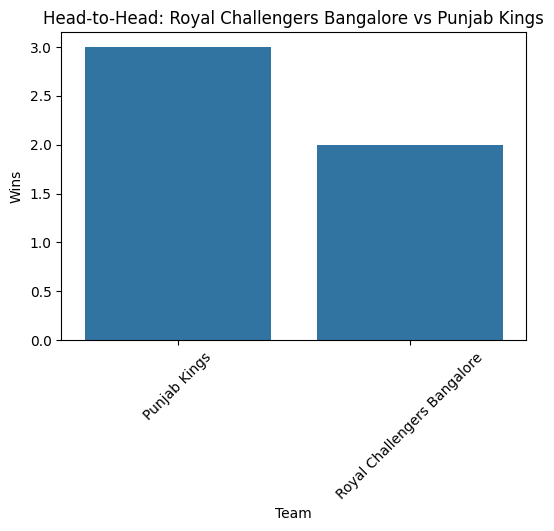

In [87]:
team1 = 'Royal Challengers Bangalore'
team2 = 'Punjab Kings'
venue = 'M.Chinnaswamy Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 35: 
#### Gujarat Titans VS Delhi Capitals
#### Venue:Narendra Modi Stadium

⚠️ Warning: Venue 'Narendra Modi Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Gujarat Titans vs Delhi Capitals at Narendra Modi Stadium
 Predicted Toss Winner: Delhi Capitals
 Predicted Match Winner: Delhi Capitals


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


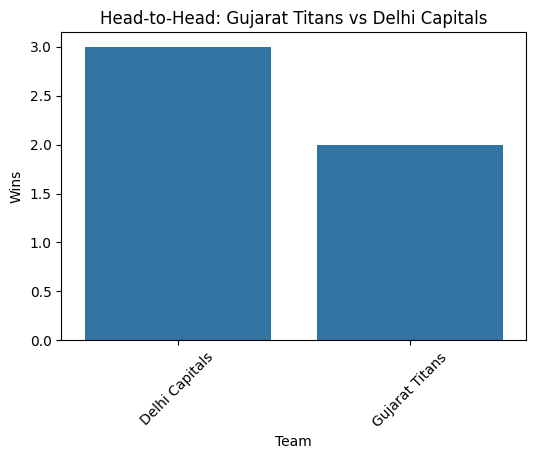

In [88]:
team1 = 'Gujarat Titans'
team2 = 'Delhi Capitals'
venue = 'Narendra Modi Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 36: 
#### Rajasthan Royals VS Lucknow Super Giants
#### Venue:Sawai Mansingh Stadium

c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(



 Rajasthan Royals vs Lucknow Super Giants at Sawai Mansingh Stadium
 Predicted Toss Winner: Rajasthan Royals
 Predicted Match Winner: Rajasthan Royals


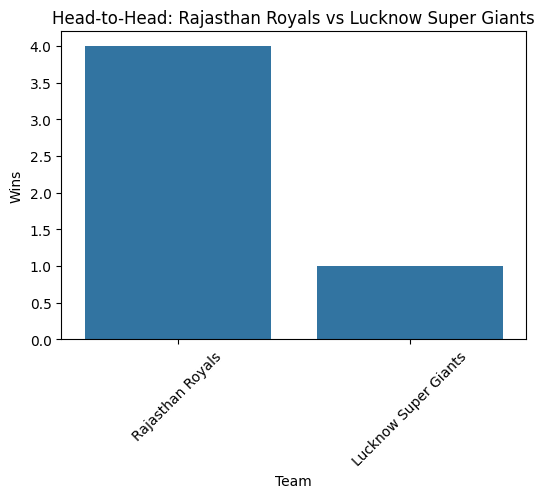

In [89]:
team1 = 'Rajasthan Royals'
team2 = 'Lucknow Super Giants'
venue = 'Sawai Mansingh Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 37: 
#### Punjab Kings VS  Royal Challengers Bangalore
#### Venue:Maharaja Yadavindra Singh International Cricket Stadium

⚠️ Warning: Venue 'Maharaja Yadavindra Singh International Cricket Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Punjab Kings vs Royal Challengers Bangalore at Maharaja Yadavindra Singh International Cricket Stadium
 Predicted Toss Winner: Royal Challengers Bangalore
 Predicted Match Winner: Royal Challengers Bangalore


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


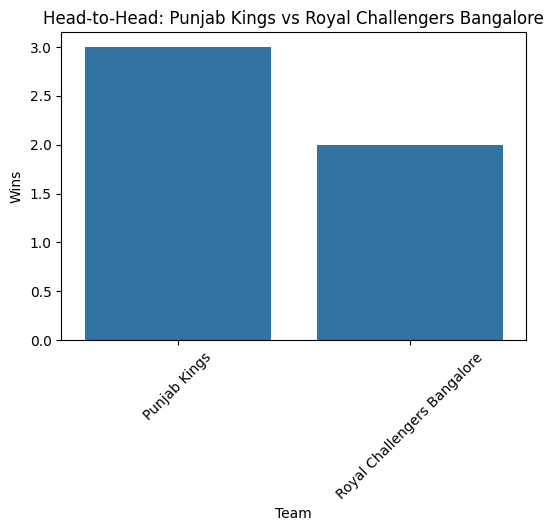

In [90]:
team1 = 'Punjab Kings'
team2 = 'Royal Challengers Bangalore'
venue = 'Maharaja Yadavindra Singh International Cricket Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 38: 
#### Chennai Super Kings VS  Mumbai Indians
#### Venue:Wankhede Stadium

c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(



 Chennai Super Kings vs Mumbai Indians at Wankhede Stadium
 Predicted Toss Winner: Mumbai Indians
 Predicted Match Winner: Mumbai Indians


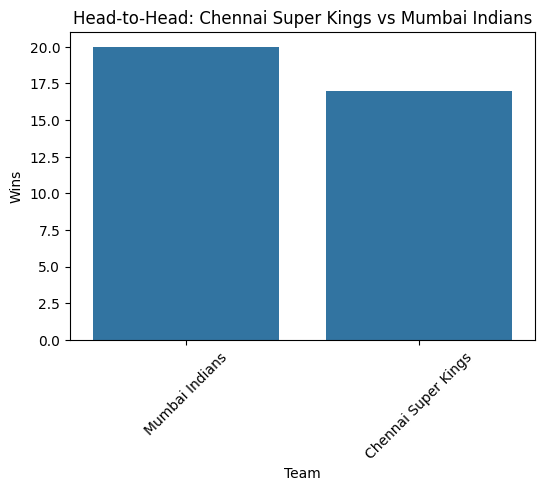

In [91]:
team1 = 'Chennai Super Kings'
team2 = 'Mumbai Indians'
venue = 'Wankhede Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 39: 
#### Kolkata Knight Riders VS  Gujarat Titans
#### Venue:Eden Gardens

c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(



 Kolkata Knight Riders vs Gujarat Titans at Eden Gardens
 Predicted Toss Winner: Gujarat Titans
 Predicted Match Winner: Gujarat Titans


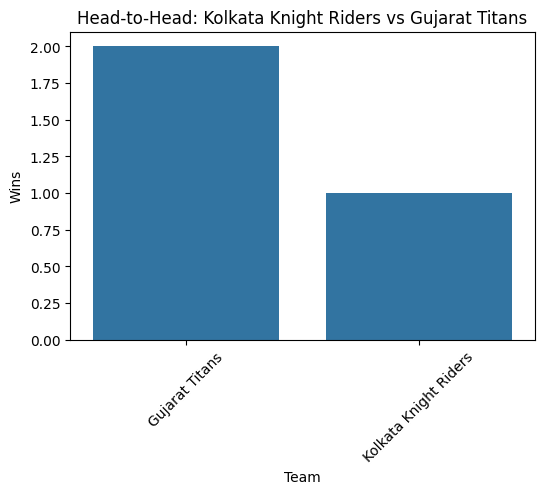

In [92]:
team1 = 'Kolkata Knight Riders'
team2 = 'Gujarat Titans'
venue = 'Eden Gardens'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 40: 
#### Lucknow Super Giants VS  Delhi Capitals 
#### Venue:Ekana Cricket Stadium 

⚠️ Warning: Venue 'Ekana Cricket Stadium ' not in training data. Using fallback 'Wankhede Stadium'.

 Lucknow Super Giants vs Delhi Capitals at Ekana Cricket Stadium 
 Predicted Toss Winner: Delhi Capitals
 Predicted Match Winner: Delhi Capitals


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


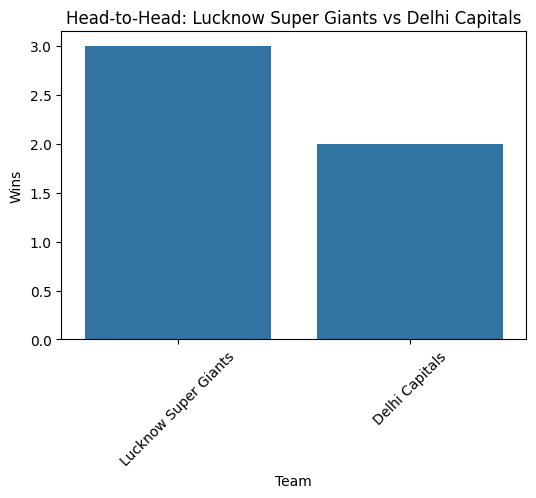

In [93]:
team1 = 'Lucknow Super Giants'
team2 = 'Delhi Capitals'
venue = 'Ekana Cricket Stadium '


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 41: 
####  Sunrisers Hyderabad VS  Mumbai Indians
#### Venue:Rajiv Gandhi International Stadium


 Sunrisers Hyderabad vs Mumbai Indians at Rajiv Gandhi International Stadium
 Predicted Toss Winner: Mumbai Indians
 Predicted Match Winner: Sunrisers Hyderabad


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


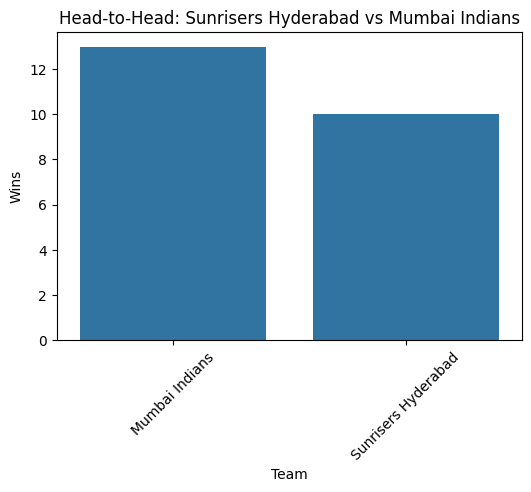

In [94]:
team1 = 'Sunrisers Hyderabad'
team2 = 'Mumbai Indians'
venue = 'Rajiv Gandhi International Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 42: 
####  Royal Challengers Bangalore VS  Rajasthan Royals
#### Venue:M.Chinnaswamy Stadium


 Royal Challengers Bangalore vs Rajasthan Royals at M.Chinnaswamy Stadium
 Predicted Toss Winner: Rajasthan Royals
 Predicted Match Winner: No Result


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


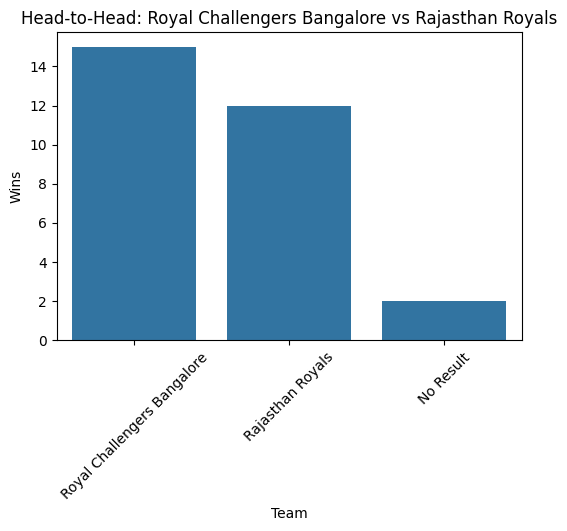

In [95]:
team1 = 'Royal Challengers Bangalore'
team2 = 'Rajasthan Royals'
venue = 'M.Chinnaswamy Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 43: 
####   Chennai Super Kings VS  Sunrisers Hyderabad
#### Venue:MA Chidambaram Stadium.


 Chennai Super Kings vs Sunrisers Hyderabad at MA Chidambaram Stadium
 Predicted Toss Winner: Chennai Super Kings
 Predicted Match Winner: Chennai Super Kings


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


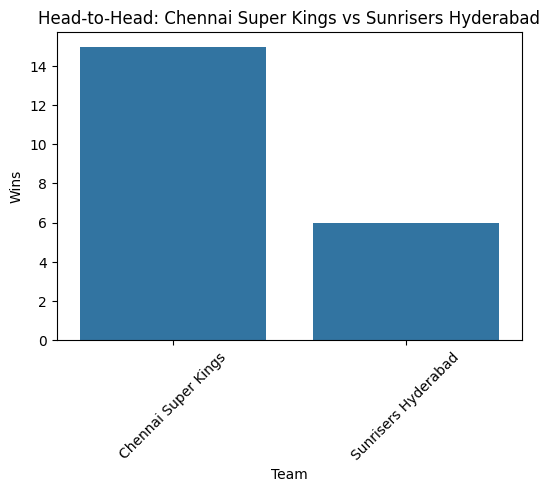

In [97]:
team1 = 'Chennai Super Kings'
team2 = 'Sunrisers Hyderabad'
venue = 'MA Chidambaram Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 44: 
####  Kolkata Knight Riders VS  Rajasthan Royals
#### Venue:Eden Gardens


 Kolkata Knight Riders vs Rajasthan Royals at Eden Gardens
 Predicted Toss Winner: Rajasthan Royals
 Predicted Match Winner: Rajasthan Royals


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


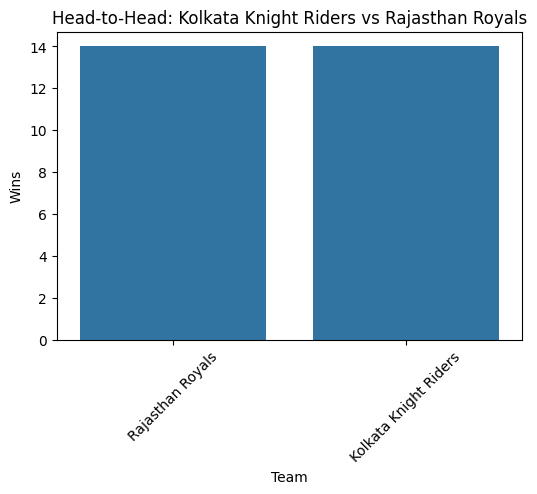

In [98]:
team1 = 'Kolkata Knight Riders'
team2 = 'Rajasthan Royals'
venue = 'Eden Gardens'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 45: 
####  Sunrisers Hyderabad VS  Delhi Capitals 
#### Venue:Rajiv Gandhi International Stadium


 Sunrisers Hyderabad vs Delhi Capitals at Rajiv Gandhi International Stadium
 Predicted Toss Winner: Delhi Capitals
 Predicted Match Winner: Sunrisers Hyderabad


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


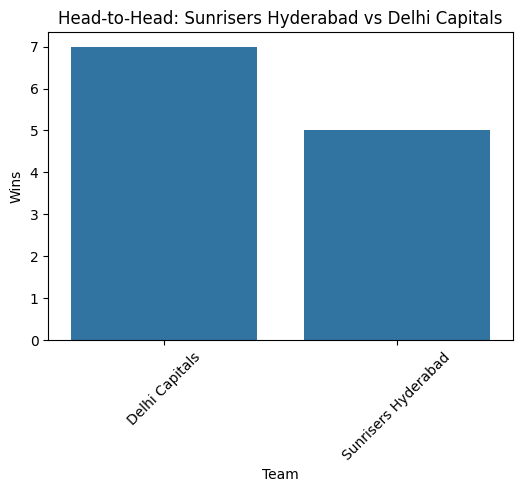

In [99]:
team1 = 'Sunrisers Hyderabad'
team2 = 'Delhi Capitals'
venue = 'Rajiv Gandhi International Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 46: 
####  Mumbai Indians  VS Gujarat Titans
#### Venue:Wankhede Stadium


 Mumbai Indians vs Gujarat Titans at Wankhede Stadium
 Predicted Toss Winner: Gujarat Titans
 Predicted Match Winner: Mumbai Indians


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


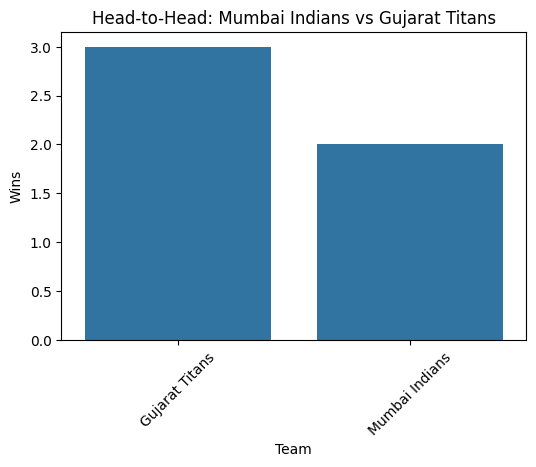

In [100]:
team1 = 'Mumbai Indians'
team2 = 'Gujarat Titans'
venue = 'Wankhede Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 47: 
####  Kolkata Knight Riders  VS Delhi Capitals
#### Venue:Eden Gardens


 Kolkata Knight Riders vs Delhi Capitals at Eden Gardens
 Predicted Toss Winner: Delhi Capitals
 Predicted Match Winner: Delhi Capitals


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


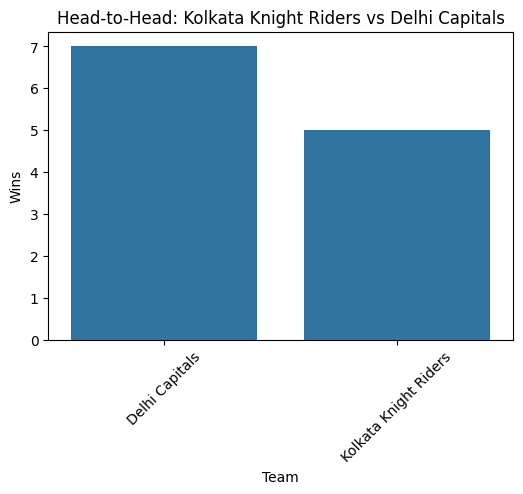

In [101]:
team1 = 'Kolkata Knight Riders'
team2 = 'Delhi Capitals'
venue = 'Eden Gardens'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 48: 
####   Punjab Kings VS  Delhi Capitals 
#### Venue:HPCA Stadium

⚠️ Warning: Venue 'HPCA Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Punjab Kings vs Delhi Capitals at HPCA Stadium
 Predicted Toss Winner: Delhi Capitals
 Predicted Match Winner: Delhi Capitals


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


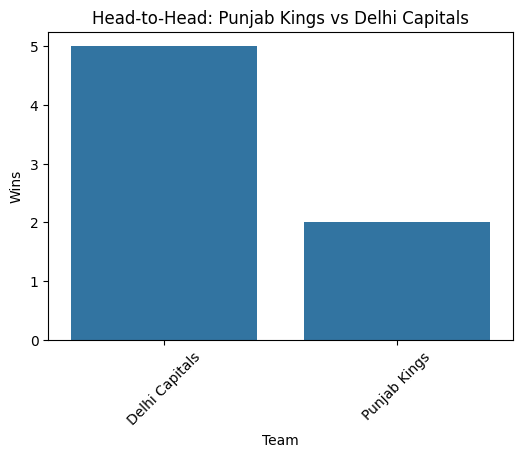

In [102]:
team1 = 'Punjab Kings'
team2 = 'Delhi Capitals'
venue = 'HPCA Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 49: 
####  Lucknow Super Giants VS Royal Challengers Bangalore
#### Venue:Ekana Cricket Stadium 

⚠️ Warning: Venue 'Ekana Cricket Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Lucknow Super Giants vs Royal Challengers Bangalore at Ekana Cricket Stadium
 Predicted Toss Winner: Royal Challengers Bangalore
 Predicted Match Winner: Lucknow Super Giants


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


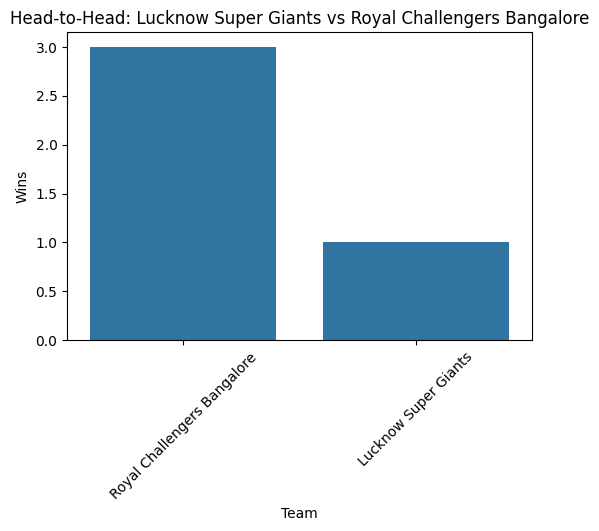

In [104]:
team1 = 'Lucknow Super Giants'
team2 = 'Royal Challengers Bangalore'
venue = 'Ekana Cricket Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 50: 
#### Sunrisers Hyderabad VS Kolkata Knight Riders 
#### Venue:Rajiv Gandhi International Stadium


 Sunrisers Hyderabad vs Kolkata Knight Riders at Rajiv Gandhi International Stadium
 Predicted Toss Winner: Sunrisers Hyderabad
 Predicted Match Winner: Kolkata Knight Riders


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


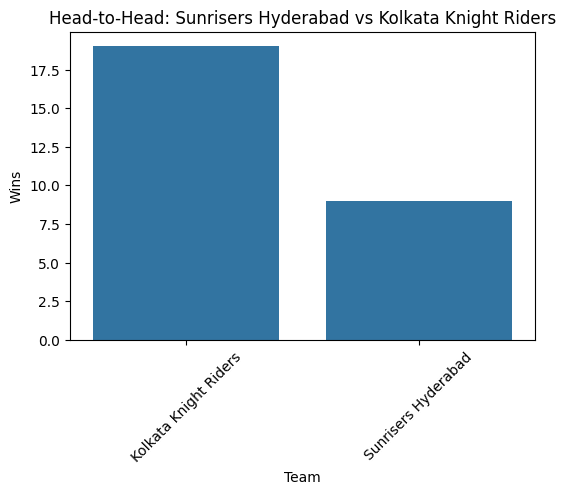

In [105]:
team1 = 'Sunrisers Hyderabad'
team2 = 'Kolkata Knight Riders'
venue = 'Rajiv Gandhi International Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 51: 
#### Punjab Kings VS Mumbai Indians 
#### Venue:HPCA Stadium

⚠️ Warning: Venue 'HPCA Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Punjab Kings vs Mumbai Indians at HPCA Stadium
 Predicted Toss Winner: Mumbai Indians
 Predicted Match Winner: Mumbai Indians


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


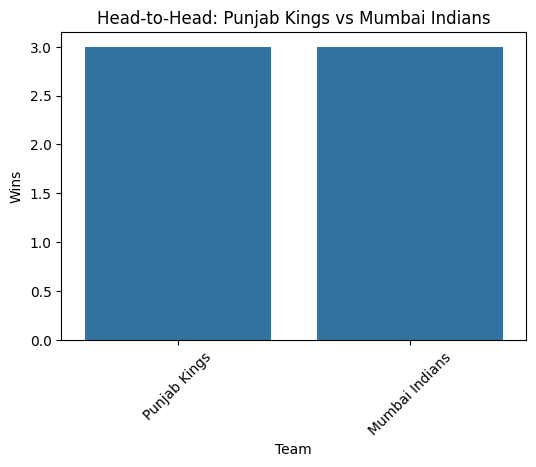

In [107]:
team1 = 'Punjab Kings'
team2 = 'Mumbai Indians'
venue = 'HPCA Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 52: 
#### Chennai Super Kings VS Rajasthan Royals
#### Venue:MA Chidambaram Stadium.


 Chennai Super Kings vs Rajasthan Royals at MA Chidambaram Stadium
 Predicted Toss Winner: Rajasthan Royals
 Predicted Match Winner: Chennai Super Kings


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


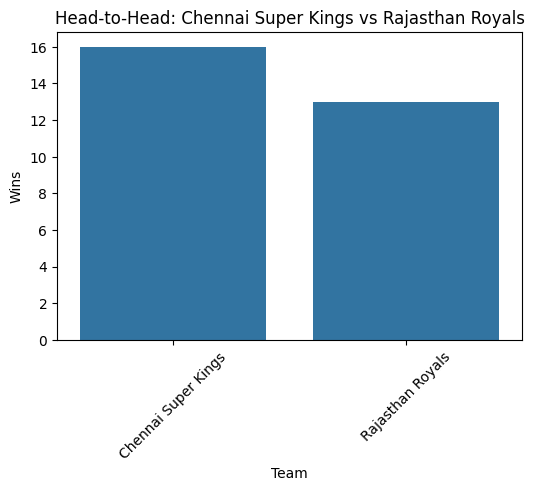

In [108]:
team1 = 'Chennai Super Kings'
team2 = 'Rajasthan Royals'
venue = 'MA Chidambaram Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 53: 
####  Royal Challengers Bangalore VS Sunrisers Hyderabad
#### Venue:M.Chinnaswamy Stadium


 Royal Challengers Bangalore vs Sunrisers Hyderabad at M.Chinnaswamy Stadium
 Predicted Toss Winner: Sunrisers Hyderabad
 Predicted Match Winner: Royal Challengers Bangalore


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


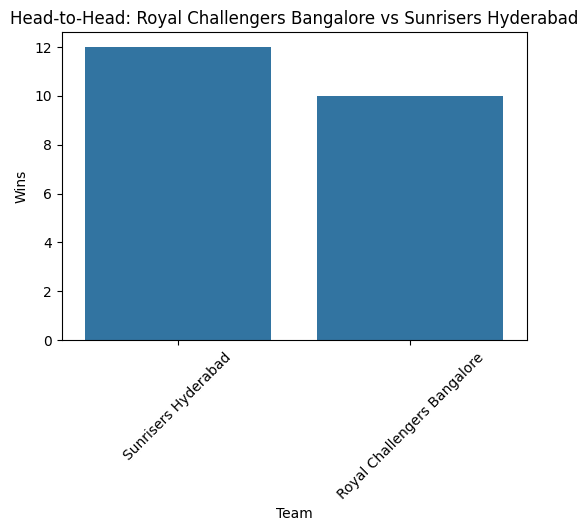

In [109]:
team1 = 'Royal Challengers Bangalore'
team2 = 'Sunrisers Hyderabad'
venue = 'M.Chinnaswamy Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 54: 
#### Lucknow Super Giants VS Gujarat Titans
#### Venue::Narendra Modi Stadium

⚠️ Warning: Venue 'Narendra Modi Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Lucknow Super Giants vs Gujarat Titans at Narendra Modi Stadium
 Predicted Toss Winner: Gujarat Titans
 Predicted Match Winner: Gujarat Titans


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


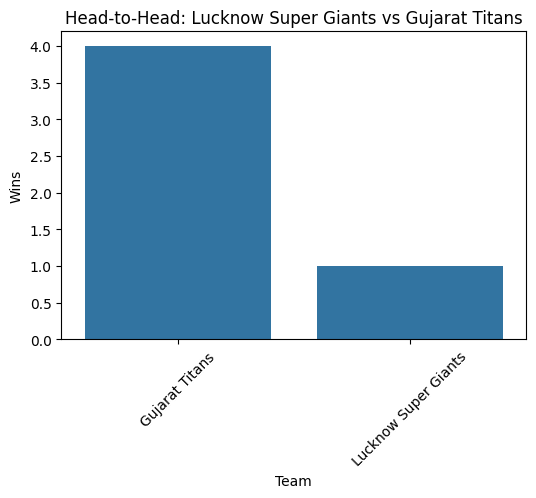

In [110]:
team1 = 'Lucknow Super Giants'
team2 = 'Gujarat Titans'
venue = 'Narendra Modi Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 55: 
#### Rajasthan Royals  VS Punjab Kings 
#### Venue:Sawai Mansingh Stadium


 Rajasthan Royals vs Punjab Kings at Sawai Mansingh Stadium
 Predicted Toss Winner: Rajasthan Royals
 Predicted Match Winner: Rajasthan Royals


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


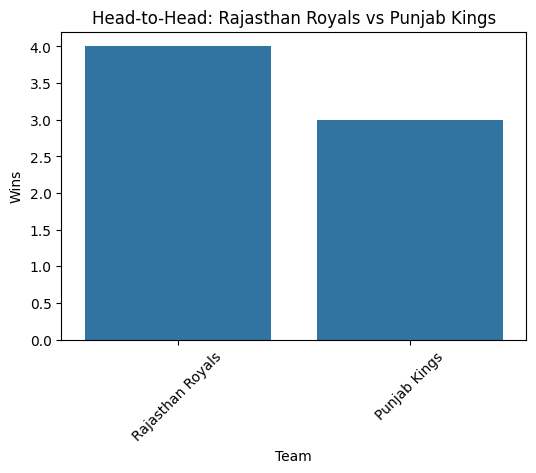

In [111]:
team1 = 'Rajasthan Royals'
team2 = 'Punjab Kings'
venue = 'Sawai Mansingh Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 56: 
####  Mumbai Indians  VS Delhi Capitals 
#### Venue:Wankhede Stadium


 Mumbai Indians vs Delhi Capitals at Wankhede Stadium
 Predicted Toss Winner: Delhi Capitals
 Predicted Match Winner: Mumbai Indians


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


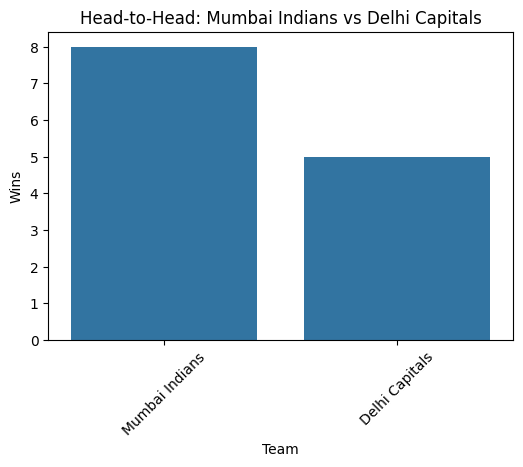

In [112]:
team1 = 'Mumbai Indians'
team2 = 'Delhi Capitals'
venue ='Wankhede Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 57: 
#### Royal Challengers Bangalore  VS Kolkata Knight Riders 
#### Venue:M.Chinnaswamy Stadium


 Royal Challengers Bangalore vs Kolkata Knight Riders at M.Chinnaswamy Stadium
 Predicted Toss Winner: Kolkata Knight Riders
 Predicted Match Winner: Kolkata Knight Riders


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


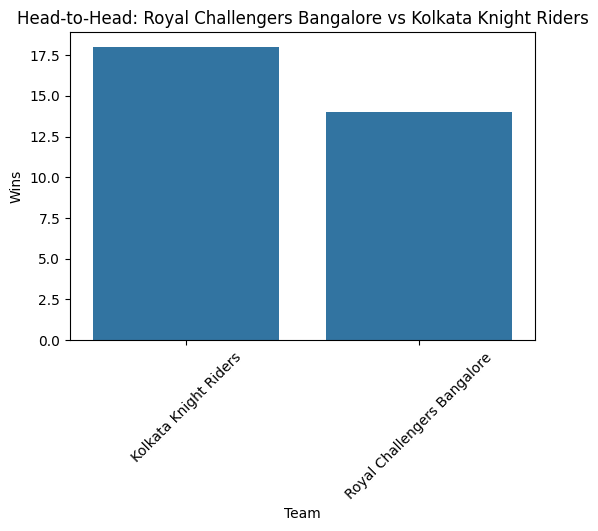

In [113]:
team1 = 'Royal Challengers Bangalore'
team2 = 'Kolkata Knight Riders'
venue = 'M.Chinnaswamy Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 58: 
####  Gujarat Titans VS Chennai Super Kings 
#### Venue: Narendra Modi Stadium

⚠️ Warning: Venue 'Narendra Modi Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Gujarat Titans vs Chennai Super Kings at Narendra Modi Stadium
 Predicted Toss Winner: Chennai Super Kings
 Predicted Match Winner: Chennai Super Kings


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


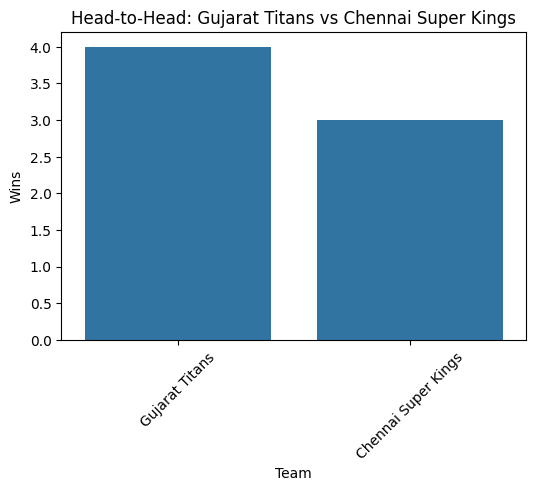

In [114]:
team1 = 'Gujarat Titans'
team2 = 'Chennai Super Kings'
venue = 'Narendra Modi Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()

## Match 59: 
####  Lucknow Super Giants VS Sunrisers Hyderabad
#### Venue: Ekana Cricket Stadium 

⚠️ Warning: Venue 'Ekana Cricket Stadium' not in training data. Using fallback 'Wankhede Stadium'.

 Lucknow Super Giants vs Sunrisers Hyderabad at Ekana Cricket Stadium
 Predicted Toss Winner: Lucknow Super Giants
 Predicted Match Winner: Lucknow Super Giants


c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Users\Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


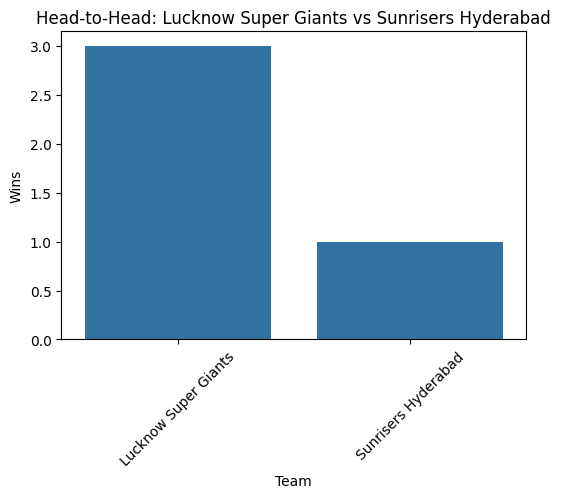

In [116]:
team1 = 'Lucknow Super Giants'
team2 = 'Sunrisers Hyderabad'
venue = 'Ekana Cricket Stadium'


toss, winner = predict_winner(team1, team2, venue)

print(f"\n {team1} vs {team2} at {venue}")
print(" Predicted Toss Winner:", toss)
print(" Predicted Match Winner:", winner)


mask = ((matches['team1'] == team1) & (matches['team2'] == team2)) | \
       ((matches['team1'] == team2) & (matches['team2'] == team1))
h2h_matches = matches[mask]
win_counts = h2h_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values)
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.ylabel("Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.show()